# PyTorch Basics
Notebook containing all the pytorch basics, and how to use it
Most of the examples here are from the [PyTorch for beginners youtube playlist](https://youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN&si=lit5_4epyM5EfqnG)

In [1]:
import torch

## Basic Tensor Operations

In [2]:
# Few ways you could create tensors
z = torch.zeros(5, 3, dtype=torch.int16) # The default type is torch.float32
print(z)
print(z.type)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)
<built-in method type of Tensor object at 0x7fc802b38d70>


In [3]:
# Generating a random tensor (for example initializing weights)
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print(r1)

# Will be different from r1
r2 = torch.rand(2, 2)
print(r2)

# Will be the same as r1
torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [4]:
# Tensor addition (they must be of the same shape)
print(torch.ones(2, 3) + torch.ones(2, 3) * 2)

r = (torch.rand(2, 2) - 0.5) * 2
print(r)

print(torch.abs(r))
print(torch.asin(r))
print(torch.det(r))
print(torch.svd(r))
print(torch.std_mean(r))
print(torch.max(r))

tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[-0.1568, -0.8619],
        [-0.5336, -0.1907]])
tensor([[0.1568, 0.8619],
        [0.5336, 0.1907]])
tensor([[-0.1574, -1.0390],
        [-0.5628, -0.1919]])
tensor(-0.4300)
torch.return_types.svd(
U=tensor([[-0.9135, -0.4069],
        [-0.4069,  0.9135]]),
S=tensor([0.9370, 0.4589]),
V=tensor([[ 0.3846, -0.9231],
        [ 0.9231,  0.3846]]))
(tensor(0.3312), tensor(-0.4357))
tensor(-0.1568)


## Autograd

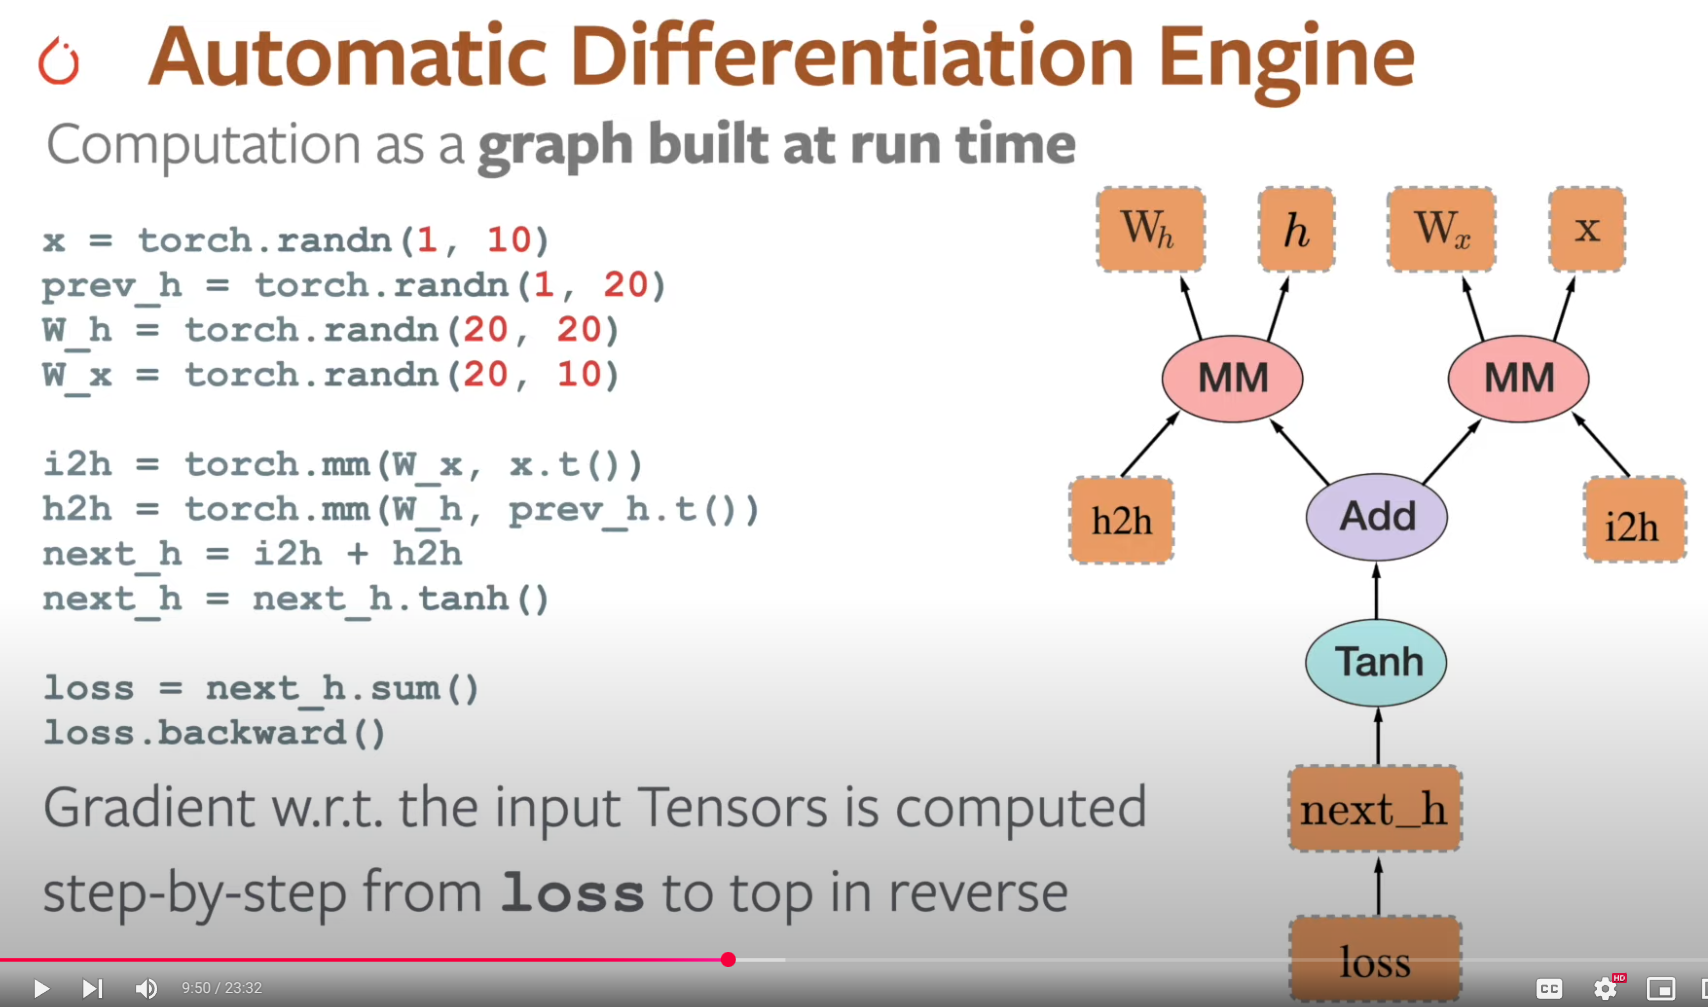


## Simple PyTorch Model
We will try the LeNet-5 Model

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
# Standard LeNet function
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


    def num_flat_features(self, x):
        size = x.size()[1:] # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        

#### Visualizing what convulational layers
    Checkout https://github.com/vdumoulin/conv_arithmetic/tree/master

In [7]:
# Testing the model with a random input

net = LeNet()
print(net)

print("Creating a random input tensor and passing it to net")
rand_input = torch.rand(1, 1, 32, 32) # batch size (1), number of channels(1 since grey scale image), image height(32), image width (32)

print(rand_input.shape)
print("Passing rand_input to network and printing output and its shape")
output = net(rand_input)
print(output)
print(type(output))
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Creating a random input tensor and passing it to net
torch.Size([1, 1, 32, 32])
Passing rand_input to network and printing output and its shape
tensor([[ 0.0634,  0.0086, -0.1177, -0.0398,  0.0543, -0.1000,  0.0475,  0.0277,
         -0.1264,  0.0808]], grad_fn=<AddmmBackward0>)
<class 'torch.Tensor'>
torch.Size([1, 10])


## Dataset and DataLoader

In [8]:
import torchvision
import torchvision.transforms as transforms

In [27]:
# We will attempt to download the CIFAR10 dataset and use it to train a model

# We first have to define a transform that will convert the images to the right format
transform = transforms.Compose(
    [transforms.ToTensor(), # Transforms images from Pillow to torch.tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] # Normalize the image
)
trainset = torchvision.datasets.CIFAR10(root='./cifar10_data', train=True, download=True, transform=transform)

# Dataloader wraps the dataset and is resposible for organizing it into batches. It knows nothing about the dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Create the test set, notice how the train flag is false
testset = torchvision.datasets.CIFAR10(root='./cifar10_data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

# These are all the classes for the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

torch.Size([3, 32, 32])
 frog  ship plane truck


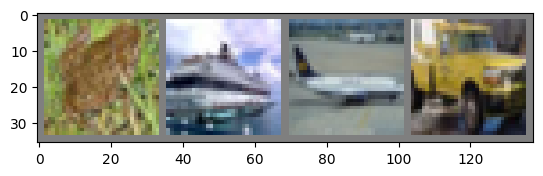

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizing the dataset

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images[0].shape)
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Example of a simple training loop

In [39]:
# Creating a simple model similar to LeNet to train on cifar 10 dataset

# Standard LeNet function
class CIFAR10Network(nn.Module):
    def __init__(self):
        super(CIFAR10Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = CIFAR10Network()

In [40]:
import torch.optim as optim
# Define the loss and the optimizer
criterion = nn.CrossEntropyLoss() # The cross entropy loss for classification
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(2): # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # Zero gradient here is an important step
        # Gradients are accumulated over a batch, if we don't reset the gradient here we will keep accumulating gradients
        # making it impossible to train
        optimizer.zero_grad() 

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Compute the gradients that will direct the learning
        optimizer.step() # actually learn (one learning step)

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 minibatches
            print(f"[{epoch}, {i}] loss: {running_loss / 2000}")
            running_loss = 0.0

[0, 1999] loss: 2.1633299897313116
[0, 3999] loss: 1.8135272308290005
[0, 5999] loss: 1.6449017888605595
[0, 7999] loss: 1.553094375833869
[0, 9999] loss: 1.5057567360550166
[0, 11999] loss: 1.4424382111653686
[1, 1999] loss: 1.3871691586747765
[1, 3999] loss: 1.3572578587755562
[1, 5999] loss: 1.3368287393972278
[1, 7999] loss: 1.3060598632842302
[1, 9999] loss: 1.2664268703386188
[1, 11999] loss: 1.2749964699298144


In [42]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}')

Accuracy of the network on the 10000 test images: 53.43


## Deployment with torchscript
Pytorch has a just in time compiler (or JIT) that could be used to opimize the runtime performance of your model